In [1]:
# https://data.world/aaizemberg/absenteeismatwork/workspace/file?filename=Absenteeism_at_work.csv
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import pickle 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read csv file and convert to dataframe
data = pd.read_csv('../data/Absenteeism_at_work2.csv')
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
data.shape

(740, 21)

<AxesSubplot:>

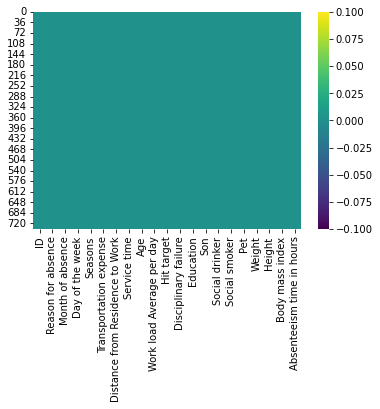

In [4]:
# Check for null value
sns.heatmap(data.isnull(), cmap='viridis')

### Clean & Pre-processing data

In [29]:
# Rename columns
data = data.rename(columns={"Distance from Residence to Work": "Distance", "Reason for absence": "Reasons",
                            "Month of absence": "Month", "Day of the week": "DayNbr",
                            "Transportation expense": "Travel_expense", "Service time": "Service_time", 
                            "Work load Average per day": "Average_daily_workload", 
                            "Disciplinary failure" : "Discip_failures","Social drinker":"Social_drinker",
                            "Social smoker" : "Social_smoker", "Body mass index": "BMI",
                            "Absenteeism time in hours": "Total_hrs_absence","Hit target": "Hit_target"
                           })
data

,ID,Reasons,Month,DayNbr,Seasons,Travel_expense,Distance,Service_time,Age,Average_daily_workload,...,Discip_failures,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,BMI,Total_hrs_absence
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [30]:
# df.to_csv("../data/absenteeism_clean.csv", index=False)

In [31]:
data.drop(columns=["ID"])

,Reasons,Month,DayNbr,Seasons,Travel_expense,Distance,Service_time,Age,Average_daily_workload,Hit_target,Discip_failures,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,BMI,Total_hrs_absence
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


In [32]:
df=[]
df = data.copy()
df.head(3)

,ID,Reasons,Month,DayNbr,Seasons,Travel_expense,Distance,Service_time,Age,Average_daily_workload,...,Discip_failures,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,BMI,Total_hrs_absence
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2


In [33]:
df.shape

(740, 21)

In [34]:
df.describe()

,ID,Reasons,Month,DayNbr,Seasons,Travel_expense,Distance,Service_time,Age,Average_daily_workload,...,Discip_failures,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,BMI,Total_hrs_absence
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


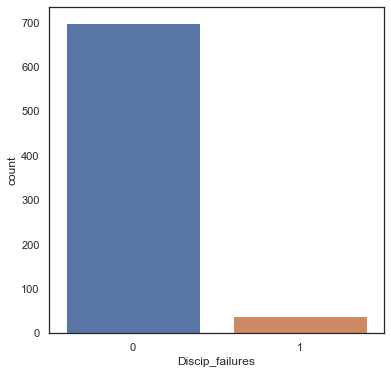

In [35]:
# Check count for Discip_failures
plt.subplots(figsize=(6, 6))
sns.countplot(df["Discip_failures"])
plt.show()

In [36]:
# Compute the correlation matrix
corr = df.corr()

<AxesSubplot:>

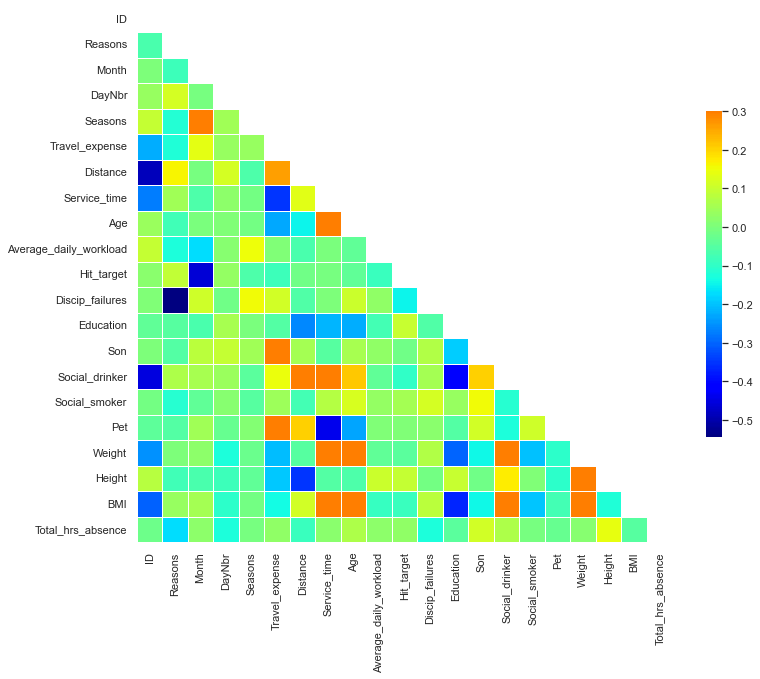

In [37]:
# Plot the correlation matrix of the values between the columns
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="jet", vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [38]:
# Use the column Discipline_failures as the predicted value
y = df["Discip_failures"]
X = df.drop(columns=["Discip_failures"])
print(X.shape, y.shape)

(740, 20) (740,)


## Build & find the best fit ML model by applying various algorithms

##### Model 1: Linear regression feature importance

Feature: 0, Score: -0.00093
Feature: 1, Score: -0.01513
Feature: 2, Score: -0.00291
Feature: 3, Score: 0.00598
Feature: 4, Score: 0.02371
Feature: 5, Score: 0.00002
Feature: 6, Score: -0.00221
Feature: 7, Score: -0.00367
Feature: 8, Score: 0.00036
Feature: 9, Score: -0.00041
Feature: 10, Score: -0.00188
Feature: 11, Score: -0.01467
Feature: 12, Score: 0.01115
Feature: 13, Score: 0.06836
Feature: 14, Score: 0.12644
Feature: 15, Score: 0.00189
Feature: 16, Score: 0.00817
Feature: 17, Score: -0.01054
Feature: 18, Score: -0.01832
Feature: 19, Score: -0.00381


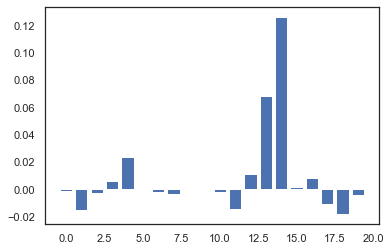

Training Data Score:  41.30 %
Testing Data Score: 29.36 %


In [15]:
# Model 1: Linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model.fit(X_train, y_train)
# get importance

importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Print score 
print(f"\u001b[35mTraining Data Score:  %.2f" % (model.score(X_train, y_train)*100),"%")
print(f"\u001b[35mTesting Data Score: %.2f" % (model.score(X_test, y_test)*100),"%")

##### Model 2: Logistic regression for feature importance

Feature: 0, Score: 0.11809
Feature: 1, Score: -1.34942
Feature: 2, Score: 0.61368
Feature: 3, Score: -0.10600
Feature: 4, Score: 0.06768
Feature: 5, Score: 0.00806
Feature: 6, Score: -0.11186
Feature: 7, Score: 0.01684
Feature: 8, Score: -0.19644
Feature: 9, Score: 0.01297
Feature: 10, Score: 0.26704
Feature: 11, Score: -0.04808
Feature: 12, Score: 0.04681
Feature: 13, Score: 0.06446
Feature: 14, Score: 0.11209
Feature: 15, Score: 0.17518
Feature: 16, Score: -0.00364
Feature: 17, Score: -0.15476
Feature: 18, Score: 0.15794
Feature: 19, Score: -1.15347


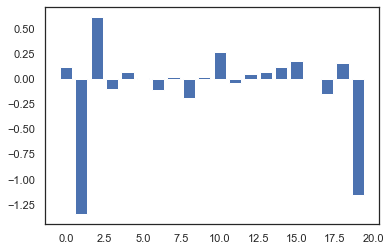

Training Data Score:  100.00 %
Testing Data Score: 99.18 %


In [16]:
# Model 2: Logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# define the model
model = LogisticRegression()

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model.fit(X_train, y_train)

# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Print score 
print(f"\u001b[35mTraining Data Score:  %.2f" % (model.score(X_train, y_train)*100),"%")
print(f"\u001b[35mTesting Data Score: %.2f" % (model.score(X_test, y_test)*100),"%")

##### Model 3: Decision tree regressor for feature importance on a regression problem 

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.92934
Feature: 2, Score: 0.07066
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000


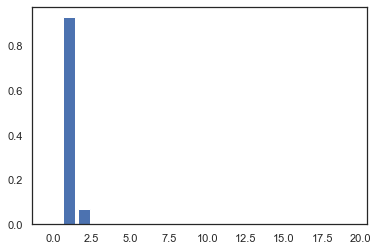

Training Data Score:  100.00 %
Testing Data Score: 100.00 %


In [17]:
# Model 3: Decision tree regressor for feature importance on a regression problem 
# Using CART feature Importance, CART = Classification and regression trees
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor

# define the model
model = DecisionTreeRegressor()

# fit the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Print score 
print(f"\u001b[35mTraining Data Score:  %.2f" % (model.score(X_train, y_train)*100),"%")
print(f"\u001b[35mTesting Data Score: %.2f" % (model.score(X_test, y_test)*100),"%")

##### Model 4: Decision tree classifier for feature importance on a classification problem

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.07066
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.92934


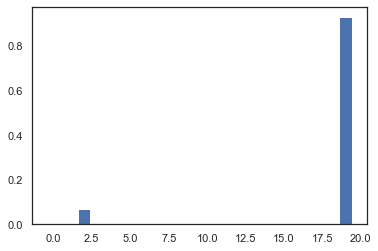

Training Data Score:  100.00 %
Testing Data Score: 100.00 %


In [18]:
# Model 4: Decision tree classifier for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# define the model
model = DecisionTreeClassifier()

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Print score 
print(f"\u001b[35mTraining Data Score:  %.2f" % (model.score(X_train, y_train)*100),"%")
print(f"\u001b[35mTesting Data Score: %.2f" % (model.score(X_test, y_test)*100),"%")

##### Model 5: Random forest regressor for feature importance on a regression problem

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.46540
Feature: 2, Score: 0.05867
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00965
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.46628


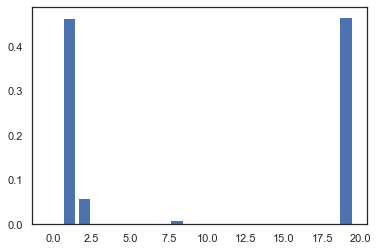

Training Data Score:  99.66 %
Testing Data Score: 99.12 %


In [19]:
# Model 5: Random forest regressor for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

# define the model
model = RandomForestRegressor()

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# # Print score 
print(f"\u001b[35mTraining Data Score:  %.2f" % (model.score(X_train, y_train)*100),"%")
print(f"\u001b[35mTesting Data Score: %.2f" % (model.score(X_test, y_test)*100),"%")

##### Model 6: Random forest classifier for feature importance on a classification problem

Feature: 0, Score: 0.00464
Feature: 1, Score: 0.40787
Feature: 2, Score: 0.02641
Feature: 3, Score: 0.01020
Feature: 4, Score: 0.01676
Feature: 5, Score: 0.01581
Feature: 6, Score: 0.02212
Feature: 7, Score: 0.00451
Feature: 8, Score: 0.01199
Feature: 9, Score: 0.01611
Feature: 10, Score: 0.01178
Feature: 11, Score: 0.00098
Feature: 12, Score: 0.00183
Feature: 13, Score: 0.00109
Feature: 14, Score: 0.00610
Feature: 15, Score: 0.00605
Feature: 16, Score: 0.01301
Feature: 17, Score: 0.01064
Feature: 18, Score: 0.01250
Feature: 19, Score: 0.39962


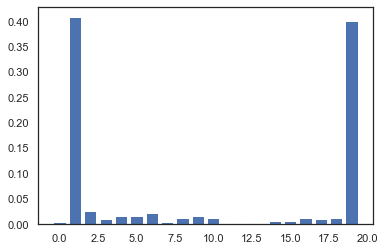

Training Data Score:  100.00 %
Testing Data Score: 99.59 %


In [20]:
# Model 6: Random forest classifier for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier()

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Print score 
print(f"\u001b[35mTraining Data Score:  %.2f" % (model.score(X_train, y_train)*100),"%")
print(f"\u001b[35mTesting Data Score: %.2f" % (model.score(X_test, y_test)*100),"%")

##### Model 7: Xgboost regressor for feature importance on a regression problem

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.93581
Feature: 2, Score: 0.06419
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000


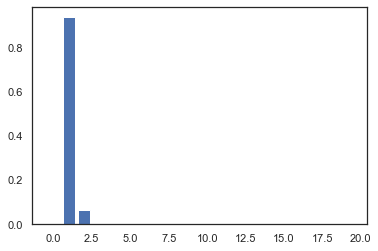

Training Data Score:  100.00 %
Testing Data Score: 100.00 %


In [21]:
# Model 7: Xgboost regressor for feature importance on a regression problem
# !pip install xgboost
import xgboost
from sklearn.datasets import make_regression
from xgboost import XGBRegressor

# define the model
model = XGBRegressor()

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# # Print score 
print(f"\u001b[35mTraining Data Score:  %.2f" % (model.score(X_train, y_train)*100),"%")
print(f"\u001b[35mTesting Data Score: %.2f" % (model.score(X_test, y_test)*100),"%")

##### Model 8: Xgboost classifier for feature importance on a classification problem

Feature: 0, Score: 0.00107
Feature: 1, Score: 0.90518
Feature: 2, Score: 0.02286
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00978
Feature: 6, Score: 0.02571
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.02027
Feature: 10, Score: 0.00901
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00126
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00487
Feature: 19, Score: 0.00000


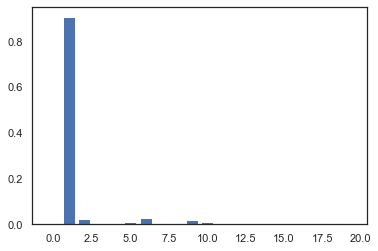

Training Data Score:  100.00 %
Testing Data Score: 100.00 %


In [22]:
# Model 8: Xgboost classifier for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier

# define the model
model = XGBClassifier()

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Print score 
print(f"\u001b[35mTraining Data Score:  %.2f" % (model.score(X_train, y_train)*100),"%")
print(f"\u001b[35mTesting Data Score: %.2f" % (model.score(X_test, y_test)*100),"%")

##### Model 9: Permutation regressor feature importance with knn for regression

Feature: 0, Score: -0.00135
Feature: 1, Score: 0.01964
Feature: 2, Score: -0.00077
Feature: 3, Score: 0.00013
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01628
Feature: 6, Score: -0.00162
Feature: 7, Score: 0.00002
Feature: 8, Score: -0.00017
Feature: 9, Score: 0.00709
Feature: 10, Score: -0.00099
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: -0.00003
Feature: 16, Score: 0.00423
Feature: 17, Score: 0.00013
Feature: 18, Score: -0.00018
Feature: 19, Score: 0.00120


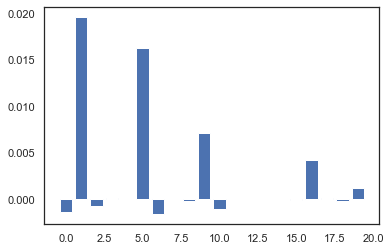

Training Data Score:  52.30 %
Testing Data Score: 29.20 %


In [23]:
# Model 9: Permutation regressor feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

# define the model
model = KNeighborsRegressor()

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model.fit(X_train, y_train)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# # Print score 
print(f"\u001b[35mTraining Data Score:  %.2f" % (model.score(X_train, y_train)*100),"%")
print(f"\u001b[35mTesting Data Score: %.2f" % (model.score(X_test, y_test)*100),"%")

##### Model 10: Permutation classifier feature importance with knn for classification

Feature: 0, Score: 0.00135
Feature: 1, Score: 0.02297
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01622
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: -0.00027
Feature: 9, Score: 0.01135
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00514
Feature: 17, Score: 0.00054
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00108


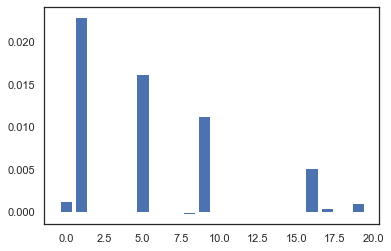

Training Data Score:  96.77 %
Testing Data Score: 96.33 %


In [40]:
# Model 10: Permutation classifier feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# define the model
model = KNeighborsClassifier()

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model.fit(X_train, y_train)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Print score 
print(f"\u001b[35mTraining Data Score:  %.2f" % (model.score(X_train, y_train)*100),"%")
print(f"\u001b[35mTesting Data Score: %.2f" % (model.score(X_test, y_test)*100),"%")

##### Model 11: Feature selection with importance

In [25]:
# Model 11: Feature selection with importance - Evaluation of a model using all features for regression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# define model
model = LogisticRegression(solver='liblinear')

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print(f'\u001b[35mAccuracy Rate: %.2f \033[0;0m' % (accuracy*100)) 

Accuracy Rate: 99.18 


##### Model 12: Random forest feature importance for features selection for classification

In [26]:
# Model 12: Random forest feature importance for features selection for classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(max_features=20))
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
y_valuate = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, y_valuate)
print('\u001b[35mAccuracy Rate: %.2f' % (accuracy*100))

Accuracy Rate: 100.00


<font color="blue">
<b> Based on the analysis above, the top 4 machine learning models that provide the 100% accuracy are:<br>
1) Model 03: using DecisionTreeRegressor()  <br> 2) Model 04: using DecisionTreeClassifier() <br> 3) Model 08: using XGBClassifier()  <br> 4) Model 12: using sklearn.feature_selection
</font>

## Save the model using pickle

In [27]:
# Create pickle file
import pickle 
knnPickle = open('../models/RFmodel_absence_discipline_prediction', 'wb') 

# Save the trained model with one of the highest accuracy (i.e. Model 12) to file 
pickle.dump(fs, knnPickle)     
knnPickle.close()

## Load the model using pickle

In [28]:
# load the model from disk using pickle
loaded_model = pickle.load(open('../models/RFmodel_absence_discipline_prediction', 'rb'))
print(loaded_model)

SelectFromModel(estimator=RandomForestClassifier(max_features=20))


<font color="blue"><li>This dataset contains too many columns and hence it's not practical to develop a front end app for requesting user input.<br><li>
It can only be used for analysing different methodologies, libraries and approaches of machine learning to achieve the best prediction and accuracy score.